In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# y = mx + b
x = np.random.normal(0, 1, 40)  # Gradient Descent works best with normalized data
y =  5* x + 10  

In [4]:
def loss_function(m, b, x, y):
    total_error = 0.0
    n = x.shape[0]
    for i in range(n):
        total_error += (y[i] - (m * x[i] + b)) ** 2
    total_error = total_error / n
    return total_error

In [5]:
def gradient_descent(m_now, b_now, x, y, learning_rate):
    dldm = 0.0
    dldb = 0.0
    n = x.shape[0]
    
    for i in range(n):
        dldm += -(2/n) * x[i] * (y[i] - (m_now * x[i] + b_now))
        dldb += -(2/n) * (y[i] - (m_now * x[i] + b_now))
     
    m = m_now - dldm * learning_rate
    b = b_now - dldb * learning_rate
    
    return m, b

In [6]:
m = 0.0
b = 0.0
learning_rate = 0.01
epoch = 1000

for i in range(epoch):
    m, b = gradient_descent(m, b, x, y, learning_rate)
    if i % 100 == 0:
        print(f'Epoch {i}, loss is {loss_function(m, b, x, y)}, m = {m}, b = {b}')       

Epoch 0, loss is 100.40042750860492, m = 0.035507323636210446, b = 0.19048487481325732
Epoch 100, loss is 4.168654858108506, m = 2.9032020375995997, b = 8.454871135199445
Epoch 200, loss is 0.3732920793610158, m = 4.224529498520867, b = 9.70088559513983
Epoch 300, loss is 0.04287865153422562, m = 4.724747591672834, b = 9.926429931171066
Epoch 400, loss is 0.005132185230052455, m = 4.903681400175443, b = 9.978321972113939
Epoch 500, loss is 0.0006178060918108481, m = 4.96646776788314, b = 9.9929674944352
Epoch 600, loss is 7.442854053527408e-05, m = 4.988347940317853, b = 9.997621709323749
Epoch 700, loss is 8.967521121689459e-06, m = 4.995953818436469, b = 9.99918247316709
Epoch 800, loss is 1.080466905975449e-06, m = 4.998595315460451, b = 9.9997172476498
Epoch 900, loss is 1.3018212650218432e-07, m = 4.999512390547168, b = 9.99990198343869


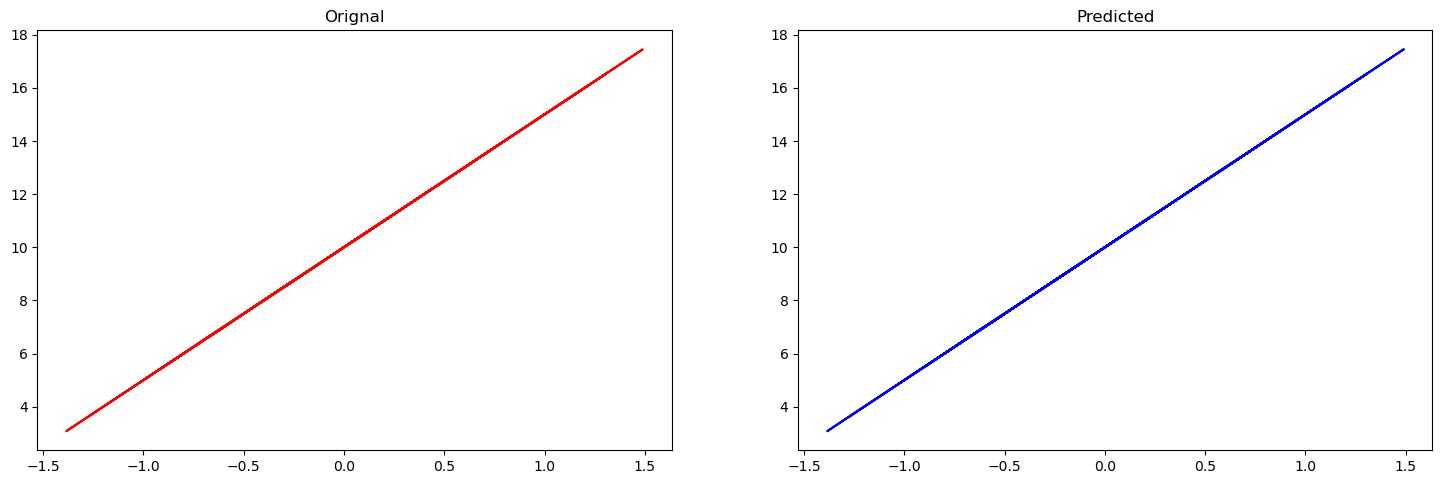

In [7]:
plt.figure("Results", (18, 12))
plt.subplot(2,2,1)
plt.plot(x, y, color = 'red', label = 'Orignal')
plt.title('Orignal')

plt.subplot(2,2,2)
plt.title('Predicted')
plt.plot(x, m*x + b, color = 'blue', label = 'Predicted')
plt.show()

### Using Normal Equation

In [16]:
x_vector = x.reshape(-1,1)                              # Making x a column vector
x_vector = np.c_[np.ones(x_vector.shape[0]), x_vector]  # We need to add one column for intercept
y_vector = y.reshape(-1,1)                              # Making y a column vector
x_t = np.transpose(x_vector)                            # X^T 
result = np.linalg.inv(x_t @ x_vector) @ x_t @ y_vector # @ Symbolizes matrix multiplication              
result

array([[10.],
       [ 5.]])